<img src="images/logos/xradar_logo.svg" width=250 alt="Xradar Logo"></img>
<img src="images/logos/arm_logo.png" width=250 alt="Xradar Logo"></img>

# An Introduction to Radar Data in Pangeo Using Xradar + Py-ART

---

## Overview
If you have an introductory paragraph, lead with it here! Keep it short and tied to your material, then be sure to continue into the required list of topics below,

1. Introduction to Py-ART 1.0
1. Introduction to xradar
1. The power of common data models
1. Visualization fun

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Introduction to Xarray](https://foundations.projectpythia.org/core/xarray/xarray-intro.html) | Necessary | Familiarity with data model |
| [Py-ART Basics](https://projectpythia.org/radar-cookbook/notebooks/foundations/pyart-basics.html) | Necessary | Familiarity with data model |
| [Understanding of NetCDF](https://foundations.projectpythia.org/core/data-formats/netcdf-cf.html) | Helpful | Familiarity with metadata structure |
| [Comet/MetEd Radar Fundamentals](https://www.meted.ucar.edu/radar/basic_wxradar/index.htm) | Helpful | Familiarity with radar science |

- **Time to learn**: estimate in minutes. For a rough idea, use 5 mins per subsection, 10 if longer; add these up for a total. Safer to round up and overestimate.
- **System requirements**:
    - Populate with any system, version, or non-Python software requirements if necessary
    - Otherwise use the concepts table above and the Imports section below to describe required packages as necessary
    - If no extra requirements, remove the **System requirements** point altogether

---

## Imports
Begin your body of content with another `---` divider before continuing into this section, then remove this body text and populate the following code cell with all necessary Python imports **up-front**:

In [1]:
import pyart
from open_radar_data import DATASETS
import xradar as xd
import xarray as xr
import hvplot.xarray
import holoviews as hv
import cartopy.crs as ccrs
import cmweather

hv.extension("bokeh")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## An Introduction to Py-ART 1.0

This is where you begin your first section of material, loosely tied to your objectives stated up front. Tie together your notebook as a narrative, with interspersed Markdown text, images, and more as necessary,

### Read in Data, Load into the Radar Object
Here, we use a sample file from a radar used for a field campaign in the Colorado Rockies!

In [38]:
file = DATASETS.fetch("gucxprecipradarcmacppiS2.c1.20220314.021559.nc")
file

'/Users/mgrover/Library/Caches/open-radar-data/gucxprecipradarcmacppiS2.c1.20220314.021559.nc'

In [39]:
radar = pyart.io.read(file)
radar

/Users/mgrover/mambaforge/envs/open-radar-pangeo-showcase-2024-dev/lib/python3.12/site-packages/pyart/io/cfradial.py:412: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/Users/mgrover/mambaforge/envs/open-radar-pangeo-showcase-2024-dev/lib/python3.12/site-packages/pyart/io/cfradial.py:412: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]


### Create a Quick Plot
One of Py-ART's key benefits is the easy plotting classes users can utilize with their radar object!

More plotting examples [in the gallery](https://arm-doe.github.io/pyart/examples/index.html)

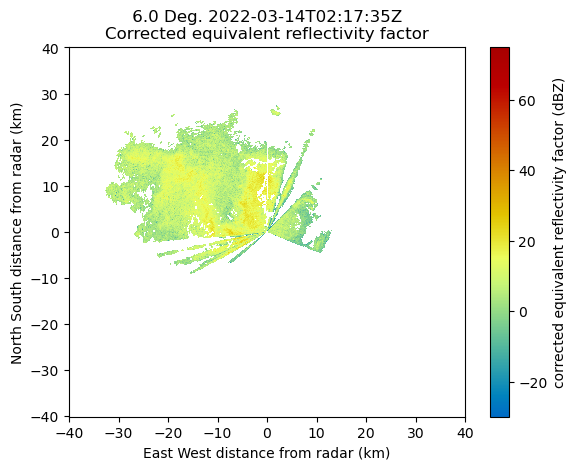

In [43]:
display = pyart.graph.RadarDisplay(radar)
display.plot("corrected_reflectivity")

### Ivestigate the radar object
But... how did we know that field was in there? What the heck is this object?

In [44]:
dir(radar)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_sweep_in_range',
 '_dic_info',
 'add_field',
 'add_field_like',
 'add_filter',
 'altitude',
 'altitude_agl',
 'antenna_transition',
 'azimuth',
 'check_field_exists',
 'drift',
 'elevation',
 'extract_sweeps',
 'fields',
 'fixed_angle',
 'gate_altitude',
 'gate_latitude',
 'gate_longitude',
 'gate_x',
 'gate_y',
 'gate_z',
 'georefs_applied',
 'get_azimuth',
 'get_elevation',
 'get_end',
 'get_field',
 'get_gate_area',
 'get_gate_lat_lon_alt',
 'get_gate_x_y_z',
 'get_nyquist_vel',
 'get_slice',
 'get_start',
 'get_start_end',
 'heading',
 'info',
 'init_gate_altitude',
 'init_gat

#### Where's the data???
It's all in the fields!

A dictionary of dictionaries... ahhh pre-xarray days...

In [45]:
radar.fields

{'DBZ': {'_FillValue': -32768.0,
  'long_name': 'Equaivalent_radar_reflectiivity_factor',
  'units': 'dBZ',
  'standard_name': 'equivalent_reflectivity_factor',
  'coordinates': 'elevation azimuth range',
  'data': masked_array(
    data=[[ 5.3499999 ,  9.38999939,  9.60999966, ...,  7.50999975,
            3.56999993,  7.52999973],
          [ 6.85999966,  8.85999966,  8.43999958, ...,  7.50999975,
            4.9000001 ,  7.52999973],
          [ 7.26999998,  8.97999954,  4.21999979, ...,  7.50999975,
            4.9000001 ,  7.52999973],
          ...,
          [10.11999989,  8.34999943,  8.13999939, ...,  7.50999975,
            7.51999998,  7.52999973],
          [ 8.94999981,  6.36999989,  6.96000004, ...,  7.50999975,
            7.51999998,  7.52999973],
          [ 7.61999989,  6.30999994,  5.29999971, ...,  7.50999975,
            7.51999998,  7.52999973]],
    mask=False,
    fill_value=1e+20)},
 'VEL': {'_FillValue': -32768.0,
  'long_name': 'Radial Doppler Velocity, Posit

In [46]:
# some subsection code
new = "helpful information"

## Introduction to xradar
Re-writing the readers, coming to a community standard.

### Reading data using xradar

We can read in a single elevation (ex. `sweep_0`)

In [47]:
first_sweep = xr.open_dataset(file, engine='cfradial1', group='sweep_0')
first_sweep

<xarray.Dataset> Size: 195MB
Dimensions:                                   (azimuth: 1159, range: 668)
Coordinates:
    time                                      (azimuth) datetime64[ns] 9kB ...
  * range                                     (range) float32 3kB 306.9 ... 4...
    elevation                                 (azimuth) float32 5kB ...
  * azimuth                                   (azimuth) float32 5kB 0.05238 ....
    latitude                                  float64 8B ...
    longitude                                 float64 8B ...
    altitude                                  float64 8B ...
Data variables: (12/37)
    DBZ                                       (azimuth, range) float64 6MB ...
    VEL                                       (azimuth, range) float64 6MB ...
    WIDTH                                     (azimuth, range) float64 6MB ...
    ZDR                                       (azimuth, range) float64 6MB ...
    PHIDP                                     (azimuth, range) float64 6MB ...
    RHOHV                                     (azimuth, range) float64 6MB ...
    ...                                        ...
    snow_rate_m2009_1                         (azimuth, range) float64 6MB ...
    snow_rate_m2009_2                         (azimuth, range) float64 6MB ...
    sweep_number                              int32 4B ...
    sweep_fixed_angle                         float32 4B ...
    sweep_mode                                <U188 752B ...
    nyquist_velocity                          (azimuth) float64 9kB ...

or the full volume!

In [48]:
dt = xd.io.open_cfradial1_datatree(file)
dt

DataTree('root', parent=None)
│   Dimensions:              (sweep: 1)
│   Dimensions without coordinates: sweep
│   Data variables:
│       sweep_group_name     (sweep) <U7 28B 'sweep_0'
│       sweep_fixed_angle    (sweep) float32 4B ...
│       latitude             float64 8B ...
│       longitude            float64 8B ...
│       altitude             float64 8B ...
│       time_coverage_start  |S192 192B ...
│       time_coverage_end    |S192 192B ...
│       volume_number        int32 4B ...
│       platform_type        |S192 192B ...
│       instrument_type      |S192 192B ...
│       primary_axis         |S192 192B ...
│   Attributes:
│       Conventions:  CF/Radial instrument_parameters ARM-1.3
│       comment:      This is highly experimental and initial data. There are man...
│       references:   See XSAPR Instrument Handbook
│       source:       Atmospheric Radiation Measurement (ARM) program X-band Scan...
│       institution:  U.S. Department of Energy Atmospheric Radiation Measurement...
│       history:      created by jrobrien on cirrus127.ccs.ornl.gov at 2022-09-26...
├── DataTree('radar_parameters')
├── DataTree('georeferencing_correction')
└── DataTree('sweep_0')
        Dimensions:                                   (azimuth: 1159, range: 668)
        Coordinates:
            time                                      (azimuth) datetime64[ns] 9kB 20...
          * range                                     (range) float32 3kB 306.9 ... 4...
            elevation                                 (azimuth) float32 5kB ...
          * azimuth                                   (azimuth) float32 5kB 0.05238 ....
            latitude                                  float64 8B ...
            longitude                                 float64 8B ...
            altitude                                  float64 8B ...
        Data variables: (12/37)
            DBZ                                       (azimuth, range) float64 6MB ...
            VEL                                       (azimuth, range) float64 6MB ...
            WIDTH                                     (azimuth, range) float64 6MB ...
            ZDR                                       (azimuth, range) float64 6MB ...
            PHIDP                                     (azimuth, range) float64 6MB ...
            RHOHV                                     (azimuth, range) float64 6MB ...
            ...                                        ...
            snow_rate_m2009_1                         (azimuth, range) float64 6MB ...
            snow_rate_m2009_2                         (azimuth, range) float64 6MB ...
            sweep_number                              int32 4B ...
            sweep_fixed_angle                         float32 4B ...
            sweep_mode                                <U188 752B 'azimuth_surveillanc...
            nyquist_velocity                          (azimuth) float64 9kB ...

### Create a quick plot of the data

In [49]:
dt = dt.xradar.georeference()
dt["sweep_0"]

DataTree('sweep_0', parent="root")
    Dimensions:                                   (azimuth: 1159, range: 668)
    Coordinates:
        time                                      (azimuth) datetime64[ns] 9kB 20...
      * range                                     (range) float32 3kB 306.9 ... 4...
        elevation                                 (azimuth) float32 5kB 5.988 ......
      * azimuth                                   (azimuth) float32 5kB 0.05238 ....
        latitude                                  float64 8B 38.9
        longitude                                 float64 8B -106.9
        altitude                                  float64 8B 3.149e+03
        crs_wkt                                   int64 8B 0
        x                                         (azimuth, range) float32 3MB 0....
        y                                         (azimuth, range) float32 3MB 30...
        z                                         (azimuth, range) float32 3MB 3....
    Data variables: (12/37)
        DBZ                                       (azimuth, range) float64 6MB ...
        VEL                                       (azimuth, range) float64 6MB ...
        WIDTH                                     (azimuth, range) float64 6MB ...
        ZDR                                       (azimuth, range) float64 6MB ...
        PHIDP                                     (azimuth, range) float64 6MB ...
        RHOHV                                     (azimuth, range) float64 6MB ...
        ...                                        ...
        snow_rate_m2009_1                         (azimuth, range) float64 6MB ...
        snow_rate_m2009_2                         (azimuth, range) float64 6MB ...
        sweep_number                              int32 4B ...
        sweep_fixed_angle                         float32 4B ...
        sweep_mode                                <U188 752B 'azimuth_surveillanc...
        nyquist_velocity                          (azimuth) float64 9kB ...

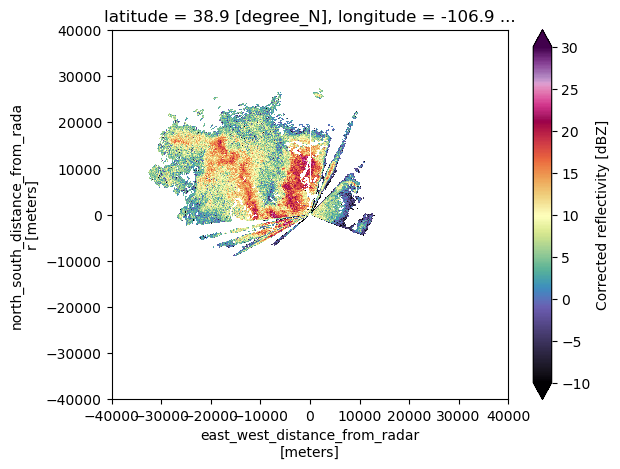

In [55]:
dt["sweep_0"]["corrected_reflectivity"].plot(x="x",
                                             y="y",
                                             cmap="ChaseSpectral",
                                             vmin=-10,
                                             vmax=30)

### Plot along an azimuth with the power of xarray

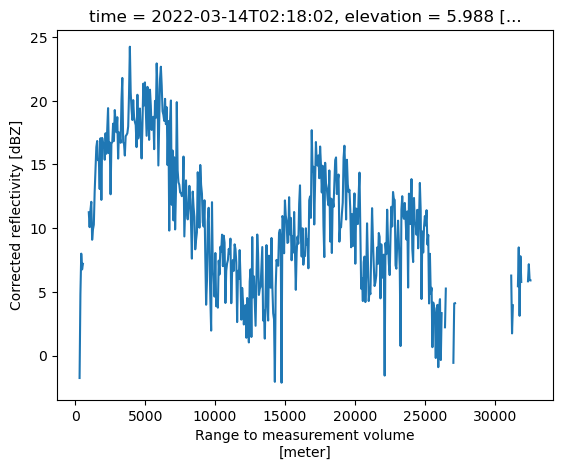

In [97]:
DBZH = dt["sweep_0"]["corrected_reflectivity"]

# Make sure we do not have duplicate azimuths - this would cause issues if we did not check here
DBZH = DBZH.drop_duplicates("azimuth")

# Select the northwest azimuth (315 degrees) to view reflectivity
DBZH.sel(azimuth=315., method='nearest').plot()

## The power of common data models

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Not every method has been implemented for the xradar-radar object bridge. If you find an issue, <a href="https://github.com/ARM-DOE/pyart/issues">open an issue</a>!
</div>

## Visualization fun

### Create an Interactive PPI Plot

In [67]:
proj_crs = xd.georeference.get_crs(dt["sweep_0"].ds)
cart_crs = ccrs.Projection(proj_crs)

In [88]:
dt["sweep_0"]["corrected_reflectivity"].hvplot.quadmesh(x="x",
                                                        y="y",
                                                        cmap="ChaseSpectral",
                                                        rasterize=True,
                                                        height=500,
                                                        width=600,
                                                        clim=(-10, 30))

:DynamicMap   []
   :Image   [x,y]   (corrected_reflectivity)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Your relevant information here!
</div>

Feel free to copy this around and edit or play around with yourself. Some other `admonitions` you can put in:

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We got this done after all!
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be careful!
</div>

We also suggest checking out Jupyter Book's [brief demonstration](https://jupyterbook.org/content/metadata.html#jupyter-cell-tags) on adding cell tags to your cells in Jupyter Notebook, Lab, or manually. Using these cell tags can allow you to [customize](https://jupyterbook.org/interactive/hiding.html) how your code content is displayed and even [demonstrate errors](https://jupyterbook.org/content/execute.html#dealing-with-code-that-raises-errors) without altogether crashing our loyal army of machines!

---

## Summary
Within this notebook, we looked at the current methods of working with radar data in Python - using Py-ART and xradar!

### What's next?
Stay tuned - following along with the:
- [xradar repository](https://github.com/openradar/xradar)
- [Py-ART repository](https://github.com/ARM-DOE/pyart)
- [openradar discourse](https://openradar.discourse.group/)

## Resources and references
 - The Python ARM Radar Toolkit (Py-ART)
     - [JJ Helmus and SM Collis; JORS 2016; doi: 10.5334/jors.119](https://openresearchsoftware.metajnl.com/articles/10.5334/jors.119#:~:text=DOI%3A%2010.5334/jors.119)
 - xradar
     - [Grover, Mühlbauer, Goudenhoofdt, Syed, Ladino; Zenodo 2024; doi: 10.5281/zenodo.10065754](https://doi.org/10.5281/zenodo.10065754)
 - SAIL Radar Data
     - Atmospheric Radiation Measurement (ARM) user facility. 2022. CSU X-Band Precip Radar (XPRECIPRADAR) PPI Corrected Moments to Antenna Coord (XPRECIPRADARCMACPPI). 2022-03-01 to 2023-03-31, ARM Mobile Facility (GUC) Gunnison, CO; Supplemental Facility 2 (S2). Compiled by R. Jackson, Z. Sherman, S. Collis, J. O'Brien, M. Grover, B. Raut, A. Theisen, M. Tuftedal and D. Feldman. ARM Data Center. Data set accessed 2024-04-02 at http://dx.doi.org/10.5439/1883164.